In [22]:
import pandas as pd

df = pd.read_excel("fishstock.xlsx")

df.head()

,池塘编号,品种名称,数量（斤）,均规格（斤/尾）,数量（尾）,结算年月
0,A1,鲫鱼,9808.28,0.730000,13436,2023-01-31 23:59:59
1,2224A,黄颡鱼,70.00,0.140000,500,2023-01-31 23:59:59
2,2224A,草鱼商品鱼,34811.14,3.234935,10761,2023-01-31 23:59:59
3,2224A,大头鱼,2475.00,3.000000,825,2023-01-31 23:59:59
4,2224A,鲫鱼,4534.40,0.800000,5668,2023-01-31 23:59:59


In [23]:
df.dtypes

池塘编号         object
品种名称         object
数量（斤）       float64
均规格（斤/尾）    float64
数量（尾）        object
结算年月         object
dtype: object

In [25]:
df_g = df.groupby(["池塘编号","结算年月"]).sum()


In [27]:
df_g = df_g.reset_index()


,池塘编号,结算年月,品种名称,数量（斤）,均规格（斤/尾）,数量（尾）
0,1106,2023-01-31 23:59:59,草鱼商品鱼鲮鱼青鱼大头鱼黄颡鱼白鲢鲫鱼,0.00,0.000000,0000000
1,1108,2023-01-31 23:59:59,大头鱼鲫鱼草鱼商品鱼黄颡鱼鲮鱼白鲢青鱼,0.00,0.000000,0000000
2,1110,2023-01-31 23:59:59,草鱼商品鱼鲫鱼大头鱼鲮鱼白鲢青鱼黄颡鱼,0.00,0.000000,0000000
3,1111,2023-01-31 23:59:59,草鱼商品鱼鳊鱼鲮鱼青鱼黄颡鱼大头鱼鲫鱼白鲢,76128.16,8.761008,06300047827210274151289355558
4,1111,2023-02-28 23:59:59,鲮鱼黄颡鱼青鱼白鲢鳊鱼鲫鱼大头鱼,83827.27,9.541160,"47,298.26,915.210.558.67,413.355.1,289."


In [29]:
df_g["结算年月"] = pd.to_datetime(df_g["结算年月"])
df_g = df_g[["池塘编号","结算年月","品种名称","数量（斤）"]]
df_g.dtypes

池塘编号             object
结算年月     datetime64[ns]
品种名称             object
数量（斤）           float64
dtype: object

In [30]:
df_g.set_index('结算年月',inplace=True)

In [31]:
df_g = df_g.groupby('池塘编号').resample('M')['数量（斤）'].sum()
df_g.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24012\3863601706.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_g = df_g.groupby('池塘编号').resample('M')['数量（斤）'].sum()


池塘编号  结算年月      
1106  2023-01-31        0.00
1108  2023-01-31        0.00
1110  2023-01-31        0.00
1111  2023-01-31    76128.16
      2023-02-28    83827.27
Name: 数量（斤）, dtype: float64

In [32]:
df_g = df_g.reset_index()
df_g.head()
df_g.to_excel('d_g.xlsx')

In [36]:
df_m = pd.read_excel('d_m.xlsx')

In [37]:
pd_t =pd.merge(df_m, df_g, left_on=['池塘编号','投喂时间'], right_on=['池塘编号','结算年月'])
pd_t.head()

,Unnamed: 0,池塘编号,投喂时间,投喂重量kg,结算年月,数量（斤）
0,0,1111,2023-01-31,2631,2023-01-31,76128.16
1,1,1111,2023-02-28,5988,2023-02-28,83827.27
2,2,1111,2023-03-31,4820,2023-03-31,106871.38
3,3,1111,2023-04-30,8576,2023-04-30,107372.01
4,4,1111,2023-05-31,7681,2023-05-31,93135.08


In [38]:
pd_t.to_excel('d_t.xlsx')

### 分析投料和鱼存塘情况

In [41]:
pd_t = pd.read_excel('d_t.xlsx')
pd_t.dtypes

池塘编号              object
投喂时间      datetime64[ns]
投喂重量kg             int64
结算年月      datetime64[ns]
数量（斤）            float64
dtype: object

In [45]:
pd_t['cum投喂'] = pd_t.groupby(['池塘编号'])['投喂重量kg'].cumsum()
pd_t['比值'] = pd_t["数量（斤）"] / pd_t['cum投喂']
pd_t.head()

pd_t.to_excel("pd_t.xlsx")

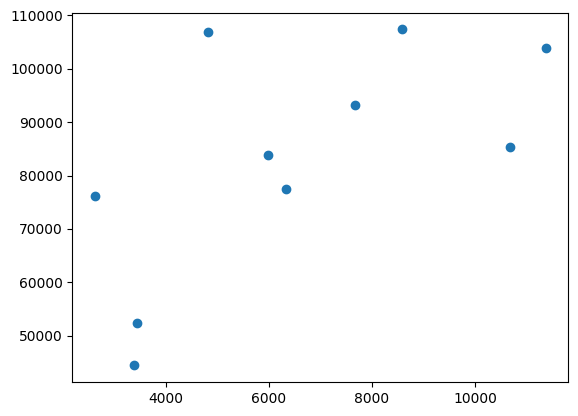

In [40]:
import matplotlib.pyplot as plt

df_1111 = pd_t[pd_t['池塘编号']=='1111']
plt.scatter(df_1111['投喂重量kg'],df_1111['数量（斤）'])

plt.show()